# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [33]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [34]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:


# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

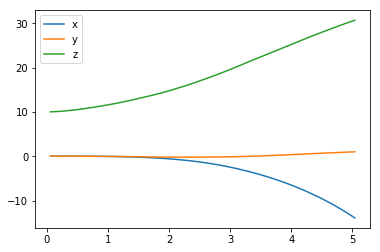

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

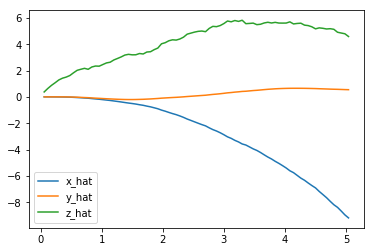

In [9]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

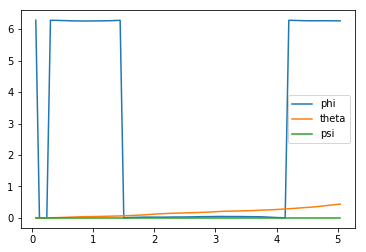

In [10]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

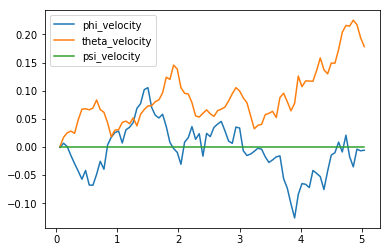

In [11]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

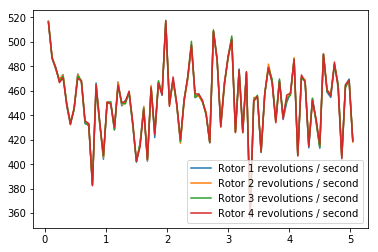

In [12]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [13]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-13.92311359   0.98782177  30.67251906   6.26437772   0.43855651   0.        ]
[-9.19240479  0.5451138   4.58360158]
[-0.00575804  0.17841612  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [14]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f}".format(
                i_episode, agent.score))# [debug]
            break
    sys.stdout.flush()

Episode =    1, score = 3224.008
Episode =    2, score = 3227.462
Episode =    3, score = 3227.461
Episode =    4, score = 3227.462
Episode =    5, score = 3227.462
Episode =    6, score = 3224.013
Episode =    7, score = 3261.947
Episode =    8, score = 3227.462
Episode =    9, score = 3224.012
Episode =   10, score = 3189.527
Episode =   11, score = 3224.877
Episode =   12, score = 3259.138
Episode =   13, score = 3186.074
Episode =   14, score = 3175.870
Episode =   15, score = 3148.021
Episode =   16, score = 3134.475
Episode =   17, score = 3218.387
Episode =   18, score = 2672.522
Episode =   19, score = 3110.580
Episode =   20, score = 3172.938
Episode =   21, score = 3222.098
Episode =   22, score = 3215.250
Episode =   23, score = 3140.604
Episode =   24, score = 3156.392
Episode =   25, score = 3218.391
Episode =   26, score = 3259.126
Episode =   27, score = 3186.072
Episode =   28, score = 3172.936
Episode =   29, score = 2578.430
Episode =   30, score = 3182.008
Episode = 

Episode =  249, score = 3259.136
Episode =  250, score = 3177.650
Episode =  251, score = 3181.349
Episode =  252, score = 3177.642
Episode =  253, score = 3177.647
Episode =  254, score = 3215.863
Episode =  255, score = 3227.465
Episode =  256, score = 3144.317
Episode =  257, score = 3196.546
Episode =  258, score = 3155.052
Episode =  259, score = 3189.161
Episode =  260, score = 3176.792
Episode =  261, score = 3103.566
Episode =  262, score = 3185.588
Episode =  263, score = 3249.936
Episode =  264, score = 3226.539
Episode =  265, score = 3259.142
Episode =  266, score = 3128.902
Episode =  267, score = 3215.876
Episode =  268, score = 3193.417
Episode =  269, score = 3117.116
Episode =  270, score = 3224.010
Episode =  271, score = 3181.353
Episode =  272, score = 3140.604
Episode =  273, score = 2955.421
Episode =  274, score = -29311461580259475292348819781451776.000
Episode =  275, score = 3170.708
Episode =  276, score = 3218.388
Episode =  277, score = 2896.290
Episode =  

Episode =  494, score = 3177.645
Episode =  495, score = 3215.250
Episode =  496, score = 3196.557
Episode =  497, score = 3177.644
Episode =  498, score = 3057.551
Episode =  499, score = 3215.871
Episode =  500, score = 3176.402
Episode =  501, score = 3087.373
Episode =  502, score = 3172.939
Episode =  503, score = 3255.890
Episode =  504, score = 3134.478
Episode =  505, score = 3181.348
Episode =  506, score = 3257.570
Episode =  507, score = 3142.187
Episode =  508, score = 3083.210
Episode =  509, score = 3185.592
Episode =  510, score = 3215.249
Episode =  511, score = 3215.257
Episode =  512, score = 3215.258
Episode =  513, score = 3189.536
Episode =  514, score = 3167.861
Episode =  515, score = 3091.851
Episode =  516, score = 3181.346
Episode =  517, score = 3175.866
Episode =  518, score = -786513819542997238345079847575879680.000
Episode =  519, score = 3215.257
Episode =  520, score = 3181.359
Episode =  521, score = 3211.869
Episode =  522, score = 3222.099
Episode = 

Episode =  740, score = 3263.214
Episode =  741, score = 3140.602
Episode =  742, score = 3172.938
Episode =  743, score = 3211.872
Episode =  744, score = 3156.542
Episode =  745, score = 3177.636
Episode =  746, score = 3224.014
Episode =  747, score = 3177.640
Episode =  748, score = 3175.647
Episode =  749, score = 3146.293
Episode =  750, score = 3128.886
Episode =  751, score = 2938.586
Episode =  752, score = 3215.247
Episode =  753, score = 3151.610
Episode =  754, score = 3215.873
Episode =  755, score = 2987.745
Episode =  756, score = 3222.101
Episode =  757, score = 3117.109
Episode =  758, score = 2907.550
Episode =  759, score = 3257.565
Episode =  760, score = 3177.652
Episode =  761, score = 3129.889
Episode =  762, score = 3238.122
Episode =  763, score = 3211.872
Episode =  764, score = 3164.413
Episode =  765, score = 3212.363
Episode =  766, score = 3171.871
Episode =  767, score = 3167.867
Episode =  768, score = 3196.546
Episode =  769, score = 3212.368
Episode = 

Episode =  989, score = 3172.933
Episode =  990, score = 3132.128
Episode =  991, score = 3129.035
Episode =  992, score = 3222.103
Episode =  993, score = 3103.563
Episode =  994, score = 3172.939
Episode =  995, score = 2891.302
Episode =  996, score = 3127.861
Episode =  997, score = 3259.137
Episode =  998, score = 3260.599
Episode =  999, score = 3078.113
Episode = 1000, score = 3192.982


This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [53]:
import numpy as np
import sys
from agents.agent import Agent
from task import Task

#<-Number of episodies->#
num_episodes = 500

#<-Algorithm parameters->#
gamma = 0.99 # Discount factor
tau = 0.1 # For soft update of target parameters
exploration_theta = 0.15 # Noise process -> same direction
exploration_sigma = 0.001 # Noise process -> random noise

#<-Variable position init->#
init_pos = np.array([0., 0., 0., 0., 0., 0.])
target_pos = np.array([0., 0., 100.])

#<-Learning Agent in the environment to take off->#
task = Task(init_pose=init_pos, target_pos=target_pos,runtime=10.)
agent = Agent(task, gamma, tau, exploration_theta, exploration_sigma)

#<-Save rewards for plotting->#
rewards = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    step = 0
    while True:
        step +=1
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            rewards.append(agent.score)
            print("\r\nEp={:4d}, score={:7.3f} (best={:7.3f}) pos={} {} {}".format(
                i_episode,
                agent.score,
                agent.best_score,
                round(task.sim.pose[:3][0],2),
                round(task.sim.pose[:3][1],2),
                round(task.sim.pose[:3][2],2)))  # [debug]
            break
    sys.stdout.flush()



Ep=   1, score=2640.293 (best=2640.293) pos=-0.55 -0.0 0.0

Ep=   2, score=2640.293 (best=2640.293) pos=-0.55 -0.0 0.0

Ep=   3, score=2640.293 (best=2640.293) pos=-0.55 -0.0 0.0

Ep=   4, score=2640.293 (best=2640.293) pos=-0.55 -0.0 0.0

Ep=   5, score=719.825 (best=2640.293) pos=-0.0 0.0 0.0

Ep=   6, score=719.825 (best=2640.293) pos=-0.03 0.0 0.0

Ep=   7, score=719.825 (best=2640.293) pos=-0.03 0.0 0.0

Ep=   8, score=719.825 (best=2640.293) pos=-0.03 0.0 0.0

Ep=   9, score=719.825 (best=2640.293) pos=-0.03 0.0 0.0

Ep=  10, score=719.825 (best=2640.293) pos=-0.03 0.0 0.0

Ep=  11, score=719.825 (best=2640.293) pos=-0.0 0.0 0.0

Ep=  12, score=719.825 (best=2640.293) pos=-0.03 -0.0 0.0

Ep=  13, score=959.805 (best=2640.293) pos=0.0 -0.0 0.0

Ep=  14, score=2160.039 (best=2640.293) pos=-0.33 -0.01 0.0

Ep=  15, score=1199.761 (best=2640.293) pos=-0.13 -0.0 0.0

Ep=  16, score=959.795 (best=2640.293) pos=-0.07 0.02 0.0

Ep=  17, score=719.842 (best=2640.293) pos=-0.06 0.01 0.0




Ep= 137, score=2160.709 (best=82358.200) pos=-0.63 0.0 0.0

Ep= 138, score=2160.708 (best=82358.200) pos=-0.63 -0.0 0.0

Ep= 139, score=2160.737 (best=82358.200) pos=-0.63 -0.0 0.0

Ep= 140, score=2160.737 (best=82358.200) pos=-0.63 0.0 0.0

Ep= 141, score=2160.737 (best=82358.200) pos=-0.63 -0.0 0.0

Ep= 142, score=2160.717 (best=82358.200) pos=-0.63 0.0 0.0

Ep= 143, score=2160.737 (best=82358.200) pos=-0.63 -0.0 0.0

Ep= 144, score=2160.737 (best=82358.200) pos=-0.63 -0.0 0.0

Ep= 145, score=2160.737 (best=82358.200) pos=-0.63 -0.0 0.0

Ep= 146, score=2160.725 (best=82358.200) pos=-0.63 0.0 0.0

Ep= 147, score=2160.728 (best=82358.200) pos=-0.63 0.0 0.0

Ep= 148, score=2160.738 (best=82358.200) pos=-0.63 -0.0 0.0

Ep= 149, score=2160.738 (best=82358.200) pos=-0.63 -0.0 0.0

Ep= 150, score=2160.727 (best=82358.200) pos=-0.63 -0.0 0.0

Ep= 151, score=2160.738 (best=82358.200) pos=-0.63 -0.0 0.0

Ep= 152, score=2160.712 (best=82358.200) pos=-0.63 0.0 0.0

Ep= 153, score=2160.715 (best


Ep= 274, score=2160.780 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 275, score=2160.779 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 276, score=2160.780 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 277, score=2160.781 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 278, score=2160.781 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 279, score=2160.781 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 280, score=2160.780 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 281, score=2160.780 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 282, score=2160.782 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 283, score=2160.781 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 284, score=2160.781 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 285, score=2160.781 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 286, score=2160.781 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 287, score=2160.782 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 288, score=2160.782 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 289, score=2160.782 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 290, score=2160.782


Ep= 409, score=2160.782 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 410, score=2160.782 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 411, score=2160.781 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 412, score=2160.781 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 413, score=2160.782 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 414, score=2160.782 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 415, score=2160.781 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 416, score=2160.781 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 417, score=2160.782 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 418, score=2160.782 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 419, score=2160.781 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 420, score=2160.781 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 421, score=2160.782 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 422, score=2160.781 (best=82358.200) pos=-0.01 1.59 0.0

Ep= 423, score=2160.782 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 424, score=2160.781 (best=82358.200) pos=-0.02 1.59 0.0

Ep= 425, score=2160.781

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

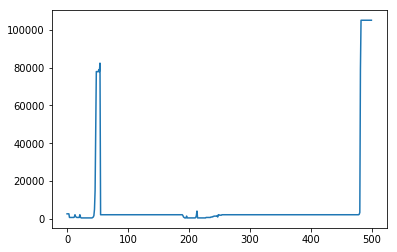

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards)
plt.show()


## Test Performance

In [55]:
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = agent.reset_episode() # start a new episode
    while True:
        rotor_speeds = agent.act(state)
        next_state, reward, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        state = next_state
        if done:
            break

The next code cell visualizes the position of the quadcopter.

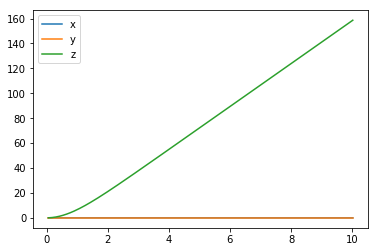

In [56]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

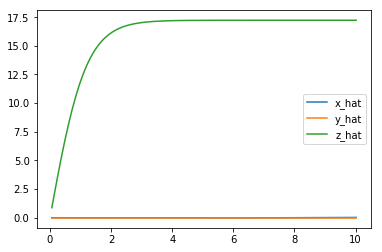

In [57]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

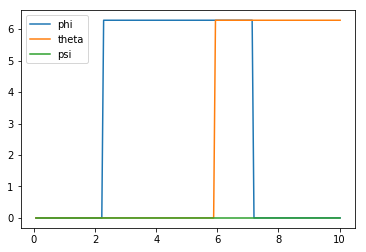

In [58]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

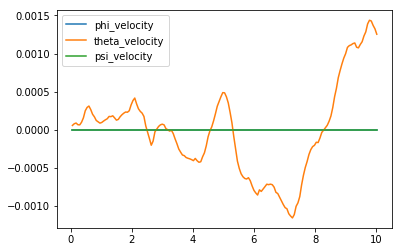

In [59]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

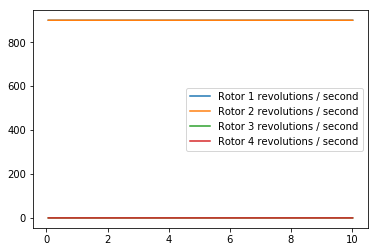

In [66]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

The cell below shows the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [61]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -3.49467134e-02  -7.69231612e-08   1.58616331e+02   4.56550353e-09
   6.28307016e+00   0.00000000e+00]
[  2.53681555e-02   3.73727343e-08   1.72330495e+01]
[  1.50788525e-09   1.25321625e-03   0.00000000e+00]


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task I have specified in `task.py` is for learning my agent to take off. For this, I defined the initial position in z=0 and target position in z=100. To get that my agent learns to take off, I have designed a reward function that penalizes in function of the distance to target pose, the sum of Euler angles and difference between velocities. These penalties are pondered by a factor to reduce its impact, and the rewards are multiple from a constant so that if the quadcopter is flying it obtains a reward of `reward_constant^2` and an extra bonus (`reward_constant^3`) if quadcopter is flying near to the target pose.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: The algorithm that I used is similar that the suggested DDPG algorithm in this lesson because I cheked in the [paper](https://arxiv.org/pdf/1509.02971.pdf) that it could be a very good choice.

This algorithm is an Actor-Critic algorithm composed by:
- An Actor that is composed of 3 dense hidden layers of size 32 - 64 - 32 with relu activation and a final layer with sigmoid activation, which is scaled. As optimizer is used Adam optimizer.
- A critic with one part for the state and one for the action, both using 2 dense hidden layers with 32 and 64 nodes and relu activation function. These parts are joined and then, these are passed with a relu activation layer. Then, the last node is a node that produces the Q-values. As optimizer is used Adam optimizer like actor algorithm.

I tried to modify it with different neural network architecture but the performance was not better, so I decided not to change it. So, after trying a lot of combinations of different and hyperparameters, I decided to use the original neural network architecture and looking for the hyperparameter to obtain the best performance. 

That hyperparameters have been:
- gamma = 0.99
- tau = 0.1
- theta = 0.15 
- sigma = 0.001 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: It was a very hard task because it is very difficult to define a good model for doing that task with good behaviour, and especially I think that build a good reward function is very difficult.

I was a gradual learning curve by moments, It seemed that the agent was learning correctly but suddenly the system changes the behaviour drastically, so finally, I would say that it was a combination of a gradual learning curve and aha moment.

The final performance of the agent is good for taking off, but it always moves above the target position. So, definitely, for taking off task the agent behaves correctly. The mean over the last 10 episodes was 105037.01385099419.

In [63]:
np.mean(rewards[-11:])

105037.01385099419

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: The hardest part of the project was specifying the task, more concretely, for finding a good reward function. I tried a lot of different rewards functions until finding a good choice. I think that the key was the simplicity of the reward function architecture.

If we look the rotor revolutions/seconds plot, we can see that rotor 3 and 4 are moving with a very high angular velocity but 1 and 2 rotors is moving with an angular velocity near to zero. And if we see the angular velocity of the quadcopter measure in Euler angles, we can see that the quadcopter take off with a big pitch both positive and negative.